In [1]:
# import the relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_date = pd.read_csv("./INPUT/dim_date.csv")
df_hotel= pd.read_csv("./INPUT/dim_hotels.csv")
df_rooms= pd.read_csv("./INPUT/dim_rooms.csv")
df_aggregated_bookings= pd.read_csv("./INPUT/fact_aggregated_bookings.csv")
df_bookings= pd.read_csv("./INPUT/fact_bookings.csv")

# Checking the dataset missing values

In [3]:
df_date.isnull().sum()

date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

In [4]:
df_hotel.isnull().sum()

property_id      0
property_name    0
category         0
city             0
dtype: int64

In [5]:
df_rooms.isnull().sum()

room_id       0
room_class    0
dtype: int64

In [6]:
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [7]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

**Observation :** 
- In dataset `df_date`, `df_
- There are 134590 total values and out of 77907 rows have null rating. Since there are more that 50% (or 57.88% ~ 58%) of rows are with null rating. Hence we will not filter out these vvalues or we cannot replace a mean, median or mode rating.

We have certain matrics for the evaluation of this project:

So, before getting started with the dataset let's understand from where we have to start working.

Basically, this project is for to regaining of the market value and the revenue of the GDS Grand.

Hence, to start with this project firstly we have to find the way to increase the revenue generated per booking so, let's get started with the `df_bookings` dataset first.

In [8]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [9]:
df_bookings.shape

(134590, 12)

In [10]:
df_bookings.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [11]:
df_bookings['room_category'].nunique()

4

In [12]:
df_bookings['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [13]:
df_bookings['room_category'].value_counts()

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

Here We have `booking_platform` as a feature now, let's check which booking platform helpful for GDS Grand and In which booking platform they have to focus more.

In [15]:
df_bookings['booking_platform'].unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [16]:
df_bookings['booking_platform'].value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

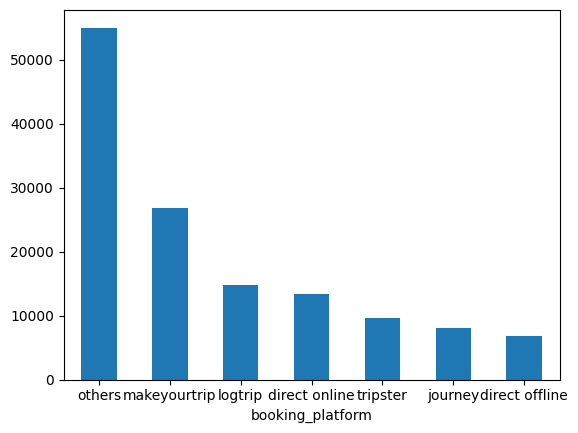

In [17]:
df_bookings['booking_platform'].value_counts().plot(kind='bar', rot=0)

**Observation :** We can see 
- `others`, `makeyourtrip` and `logtrip` are the top 3 booking platforms.

- GDS Grand have to focus more `direct offline` because it have the least bookings.

- GDS Grand can focus more on `direct offline` resource, brokers more to generate more bookings.

# Data Cleaning